In [40]:

from sklearn import datasets #pozwala zaimportowac zbior danych
import numpy as np #prowadzic obliczenia na tablicach (macierzach)
from matplotlib import pyplot as plt #rysowac



In [41]:
# generowanie zbioru danych, którego będziemy uzywać w celu uczenia i testowania sieci neuronowej

np.random.seed(0)

feature_set, labels = datasets.make_moons(100, noise = 0.1)

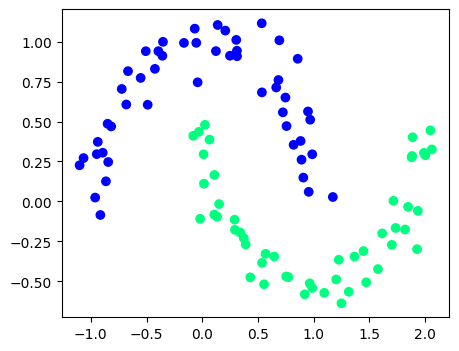

In [42]:

#visualisation of the dataset for analysis
plt.figure(figsize=(5,4)) #rozmiar figury
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap=plt.cm.winter)



In [43]:
feature_set
labels

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0])

In [44]:
print(feature_set.shape)

(100, 2)


In [45]:
type(labels.shape)

tuple

Implementacja funckji sigmoid oraz jej
pochonej

In [46]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

Wylosowanie wag oraz biasu neuronu

In [47]:
# Wylosowanie poczatkowych wartosci wag i bisau neuronu

#KROK 1 wylosowanie wag i biasu
#tworzy tablice 2 wiersze oraz 1 kolumna
weights = np.random.rand(2,1)*2-1

print(weights)
print('weights shape', weights.shape)

#wartosc bias
bias = np.random.rand(1,1)*2-1

print('\n', bias)
print('weights shape', bias.shape)

[[ 0.57709102]
 [-0.88630385]]
weights shape (2, 1)

 [[0.39399448]]
weights shape (1, 1)


Wytrenowanie sieci

In [48]:
#na wejscie neurownow wstawiamy wspolrszedne pierwszego punktu z tablicy feature_set
inputs = feature_set[:]
labels = np.reshape(labels, (inputs.shape[0],1))

learning_rate = 0.001
MSE_history = []
for iteration in range(0, 10000):
  #KROK 2 Obliczamy aktualne przewidywania modelu
  #obliczenia jakie sa realizowanie wew neuronu
  XW = np.dot(inputs, weights)
  #print('XW', XW)

  XWB = XW + bias
  #print('XWB', XWB)

  out = sigmoid(XWB)
  #print('out', out)

  # Obliczamy akltualna watosc bledu popelniangeo przez neuronMSE
  mse = 1/inputs.shape[0] * np.sum((out-labels)**2)
  MSE_history.append(mse)

  #KROK 3 Liczymy pochodne po funckj ikosztu
  dJ_dout = out - labels
  dout_dXWB = sigmoid_der(XWB)
  dXWB_dweights = inputs
  dXWB_dbias = 1

  dJ_dweights = np.dot(dXWB_dweights.T , dJ_dout * dout_dXWB)
  Dj_dbias = np.sum(dJ_dout * dout_dXWB) # DXWB_dbias = 1 wiec nie trzeba mnozyc

  #KROK 5 Poprawiamy wagi i bias

  weights = weights - learning_rate * dJ_dweights
  bias = bias - learning_rate * Dj_dbias

Granica decyzji

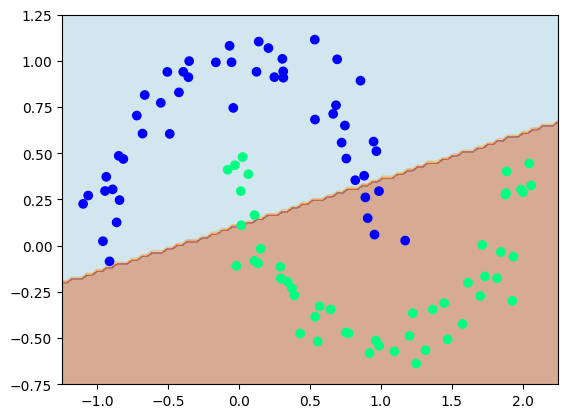

In [49]:
cmap = plt.get_cmap('Paired')


# Define region of interest by data limits
xmin = -1.25
xmax = 2.25
ymin = -0.75
ymax = 1.25


steps = 100


x_span = np.linspace(xmin, xmax, steps)
y_span = np.linspace(ymin, ymax, steps)
xx, yy = np.meshgrid(x_span, y_span)

# Plot decision boundary in region of interest
z = np.zeros(xx.shape,dtype=int)


ii=0
for i in x_span:
  jj=0
  for j in y_span:

    classification_criteria = 0.5


    if sigmoid(np.dot(np.array([i,j]),weights) + bias) > classification_criteria:
    #if i==j :
      z[jj,ii] = 1
    jj=jj+1
  ii=ii+1


fig, ax = plt.subplots()
ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)


# Get predicted labels on training data and plot
#train_labels = model.predict(X)
#ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap=plt.cm.winter)


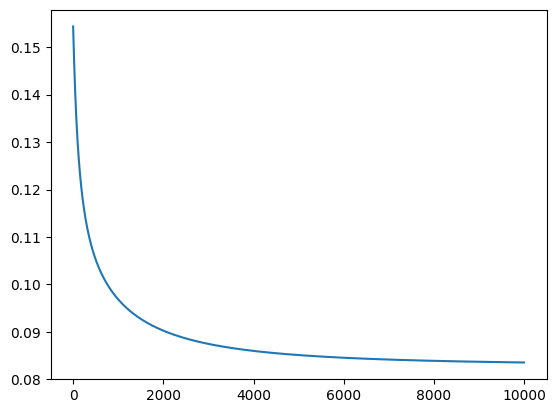

In [50]:
plt.plot(MSE_history)

Dodanie warstwy 3 neuronów

In [57]:
#KROK 1  musimy wylosowac poczatkowych wartosci wag i bisau neuronu

# losujemy dla warstwy L1 z trzema neuronami
w_hidden = np.random.rand(2,3) # w nawiasach mamy (liczba wag - polaczen do neuronu, liczba neuronow)
b_hidden = np.random.rand(1,3) # mamy trzy neurony w warstwie, kazdy ma jeden bias



#tworzy tablice 2 wiersze oraz 1 kolumna
w_out = np.random.rand(3,1)

print(w_out)
print('w_out shape', w_out.shape)

#wartosc bias tez losujemy , rozmiar tablicy 1,1
b_out = np.random.rand(1,1)

print('\n', b_out)
print('b_out shape', b_out.shape)

[[0.69002502]
 [0.69962205]
 [0.3277204 ]]
w_out shape (3, 1)

 [[0.75677864]]
b_out shape (1, 1)




Uczenie sieci

In [62]:
lr=0.01
labels=labels.reshape(100,1)
inputs=feature_set


for iteration in range(50000):


  #FORWARD
  XW_hidden=np.dot(inputs,w_hidden) + b_hidden
  hidden_out=sigmoid(XW_hidden)


  XW_out=np.dot(hidden_out,w_out)+b_out
  out=sigmoid(XW_out)


  #BACKWARD
  dJ_dout=out-labels
  dout_dXW_out=sigmoid_der(XW_out)


  dXW_out_dw_out=hidden_out
  dXW_out_db_out=1


  dJ_dw_out = np.dot( hidden_out.T, dJ_dout*dout_dXW_out)
  dJ_db_out = np.sum( dJ_dout*dout_dXW_out)

  dXW_out_dhidden_out=w_out.T
  dhidden_out_dXW_hidden=sigmoid_der(XW_hidden)

  dJ_dw_hidden=np.dot(inputs.T,dJ_dout*dout_dXW_out*dXW_out_dhidden_out*dhidden_out_dXW_hidden)
  dJ_db_hidden=np.sum(dJ_dout*dout_dXW_out*dXW_out_dhidden_out*dhidden_out_dXW_hidden,axis=0)

  w_hidden-=lr*dJ_dw_hidden
  b_hidden-=lr*dJ_db_hidden
  w_out-=lr*dJ_dw_out
  b_out-=lr*dJ_db_out


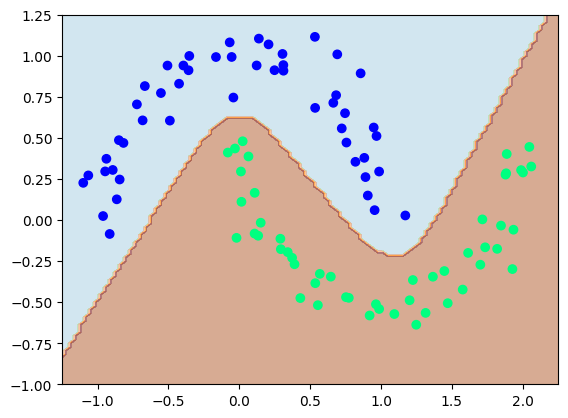

In [63]:
cmap = plt.get_cmap('Paired')

# Define region of interest by data limits
xmin = -1.25
xmax = 2.25
ymin = -1
ymax = 1.25

steps = 100

x_span = np.linspace(xmin, xmax, steps)
y_span = np.linspace(ymin, ymax, steps)
xx, yy = np.meshgrid(x_span, y_span)


# Plot decision boundary in region of interest
z = np.zeros(xx.shape,dtype=int)

ii=0
for i in x_span:
  jj=0
  for j in y_span:

    classification_criteria = 0.5

    inputs=np.array([i,j])


    #FORWARD
    XW_hidden=np.dot(inputs,w_hidden) + b_hidden
    hidden_out=sigmoid(XW_hidden)


    XW_out=np.dot(hidden_out,w_out)+b_out
    out=sigmoid(XW_out)


    if out>classification_criteria:
    #if i==j :
      z[jj,ii] = 1
    jj=jj+1
  ii=ii+1

fig, ax = plt.subplots()
ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)


# Get predicted labels on training data and plot
#train_labels = model.predict(X)
#ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap=plt.cm.winter)


Zmiana funckji kosztu z MSE na Binary Cross Entrophy

In [66]:
def MSE(y_hat,y):
  MSE_value = 1/y_hat.shape[0] * np.sum( (y_hat - y)**2)


def MSE_der(y_hat,y):
  #dJ_dout
  return (y_hat - y)


Używamy funkcji kosztu binary cross entropy

In [67]:
def Cross_Entropy(y_hat, y):
# y_hat - wartosc przewidziana dla datapointu lub datapointow
# y - wartosc prawdziwe (etykiety)
# 1/y_hat.shape[0] to jest liczba danych czyli 1/m we wzorze
  '''
  #gdyby w y_hat i y były wartości tylko dla jednego datapointu
  #mozna funkcje kosztu policzyc wprost ze wzoru za pomocą warunków if else
  if y==1:
    return -np.log(y_hat)
  else #y==0:
    return -np.log(1-y_hat)

  #ale poniewaz y_hat oraz y to najczesciej tablice z wieloma datapointami
  #musimy policzyc to inaczej
  '''
  #obliczenia dla wartosci y_hat y zapisanych jako tablice
  return 1/y_hat.shape[0]*np.sum(-1*((y==1)*np.log(y_hat))-1*(y==0)*np.log(1-y_hat))


def derivative_Cross_Entropy(y_hat, y):
#y_hat - wartosci przewidziane
#y - wartosci prawdziwe (etykiety)
  '''
  #komentarz jak przy Cross_Entropy
  if y==1:
    return -1/out
  else:
    return 1/(1-out)
  '''
  #obliczenia dla wartosci y_hat y zapisanych jako tablice
  return -1*((y==1)/y_hat)+(y==0)/(1-y_hat)



In [94]:
#na wejscie neuronu wstawiamy wspl. pierwszego punktu z tab. feture_set
inputs = feature_set
#poprawiamy ksztalt tablicy labels zeby byl zgodny z tablica out
#inputs.shape[0] - daje liczbe wierszy (punktow)
labels = np.reshape(labels, (inputs.shape[0], 1))


learning_rate = 0.001


J_history=[]


for iteration in range(0,300000):
  #KROK 2 - obliczamy aktualne przewidywania modelu
  #obliczenia jakie sa realizowane wew sieci neuronowej
  #FEEDFORWARD
  #obliczenia w warstwie L1
  XWB_l1 = np.dot(inputs, w_l1) + b_l1
  out_l1 = sigmoid(XWB_l1)


  #obliczenia w warstwie OUT
  XWB_out = np.dot(out_l1, w_out) + b_out
  out = sigmoid(XWB_out)


  #OBLICZAMY aktualna wartość bledu popelnianego przez neurnon (MSE)
  #mse = 1/inputs.shape[0] * np.sum( (out-labels)**2 )
  J_history.append(Cross_Entropy(out,labels))


  #KROK 3 - LICZYMY POCHODNE PO FCJI KOSZTU
  #warstwa out
  #Pochodna funkcji MSE
  #dJ_dout = out - labels
  #pochodna binary cross entropy
  dJ_dout = derivative_Cross_Entropy(out, labels)


  dout_dXWB_out = sigmoid_der(XWB_out)
  dXWB_out_dw_out = out_l1
  dXWB_out_db_out = 1


  #warstwa L1
  dXWB_out_dout_l1 = w_out
  dout_l1_dXWB_l1 = sigmoid_der(XWB_l1)
  dXWB_l1_dw_l1 = inputs
  dXWB_l1_db_l1 = 1


  dJ_dw_out = np.dot( dXWB_out_dw_out.T, dJ_dout * dout_dXWB_out)
  dJ_db_out = np.sum(dJ_dout * dout_dXWB_out) #DXWB_dbias = 1 wiec po co mnozyc


  dJ_dw_l1 = np.dot( dXWB_l1_dw_l1.T, np.dot( dJ_dout * dout_dXWB_out, dXWB_out_dout_l1.T ) * dout_l1_dXWB_l1)
  dJ_db_l1 = np.sum ( np.dot( dJ_dout * dout_dXWB_out, dXWB_out_dout_l1.T ) * dout_l1_dXWB_l1, axis = 0)


  #dJ_dweights_l1 = np.dot(inputs.T, np.dot(dJ_dout * dout_dXWB, weights_out.T) * sigmoid_der(XWB_l1))
  #dJ_bias_l1 = np.sum(np.dot(dJ_dout * dout_dXWB, weights_out.T) * sigmoid_der(XWB_l1), axis = 0)


  #KROK 4 - POPRAWIAMY WAGI I BIAS
  w_out = w_out - learning_rate * dJ_dw_out
  b_out = b_out - learning_rate * dJ_db_out


  w_l1 = w_l1 - learning_rate * dJ_dw_l1
  b_l1 = b_l1 - learning_rate * dJ_db_l1

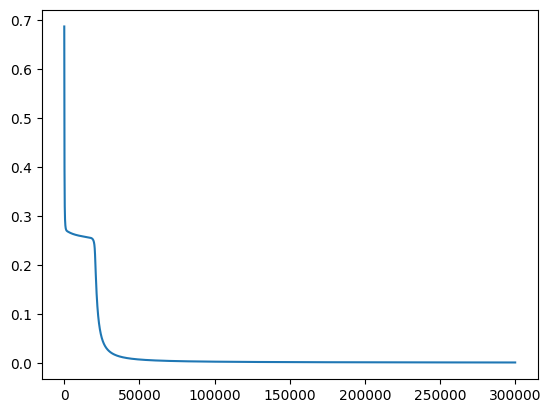

In [95]:
import matplotlib.pyplot as plt
plt.plot(J_history)

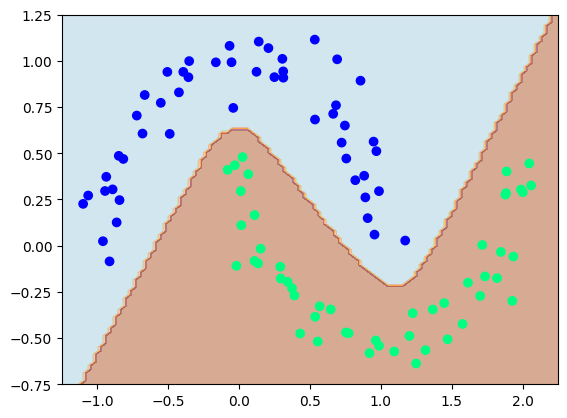

In [96]:
cmap = plt.get_cmap('Paired')


# Define region of interest by data limits
xmin = -1.25
xmax = 2.25
ymin = -0.75
ymax = 1.25


steps = 100


x_span = np.linspace(xmin, xmax, steps)
y_span = np.linspace(ymin, ymax, steps)
xx, yy = np.meshgrid(x_span, y_span)
# Plot decision boundary in region of interest
z = np.zeros(xx.shape,dtype=int)


ii=0
for i in x_span:
  jj=0
  for j in y_span:

    classification_criteria = 0.5
    #FEEDFORWARD dla wspolrzednych punktu okreslonych np.array([i,j])
    inputs = np.array([i,j])
    XWB_l1 = np.dot(inputs, w_l1) + b_l1
    out_l1 = sigmoid(XWB_l1)

    #obliczenia w warstwie OUT
    XWB_out = np.dot(out_l1, w_out) + b_out
    out = sigmoid(XWB_out)

    if out > classification_criteria:
    #if i==j :
      z[jj,ii] = 1
    jj=jj+1
  ii=ii+1


fig, ax = plt.subplots()
ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)


# Get predicted labels on training data and plot
#train_labels = model.predict(X)
#ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap=plt.cm.winter)